In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Задание 1

Чему равно математическое ожидание величины $\sum\limits_{i=1}^{n}X_{i}^{2}$, где $n$ — константа, $\ X_{i}\sim N(0,1)$? Привести решение.

Пусть $z_{1},\ldots ,z_{k}$ — совместно независимые стандартные нормальные случайные величины, то есть: $z_{i}\sim N(0,1)$. Тогда случайная величина

$x=z_{1}^{2}+\ldots +z_{k}^{2}$
имеет распределение хи-квадрат с $k$ степенями свободы, то есть $x\sim f_{\chi ^{2}(k)}(x)$

Исходя из определения распределения хи-квадрат, получаем, что наша величина имеет данное распределение. Математическое ожидание распределения хи-квадрат соответствует его степени свободы, т.е. $n$ в нашем случае.

***Ответ***: математическое ожидание величины $\sum\limits_{i=1}^{n}X_{i}^{2}$ равно $n$

# Задание 2

На любом языке программирования (предпочтительно на Python) реализовать структуру данных «куча» (heap). Продемонстрировать работу.

In [3]:
class Heap:
    def __init__(self):
        self.heaplist = []
        self.heapsize = 0

        
    def heapify(self, i):
        l = i * 2 + 1
        r = i * 2 + 2
        if l <= self.heapsize and self.heaplist[l] > self.heaplist[i]:
            largest = l
        else:
            largest = i
        if r <= self.heapsize and self.heaplist[r] > self.heaplist[largest]:
            largest = r
        if largest != i:
            tmp = self.heaplist[i]
            self.heaplist[i] = self.heaplist[largest]
            self.heaplist[largest] = tmp
            self.heapify(largest)

            
    def buildHeap(self, list_):
        self.heaplist = list_
        self.heapsize = len(list_) - 1
        for i in range(len(list_) // 2, -1, -1):
#             print(i)
            self.heapify(i)

    
    def getMax(self):
        max = self.heaplist.pop(0)
        self.buildHeap(self.heaplist)
        return max

    
    def insert(self, node):
        self.heaplist.append(node)
        self.buildHeap(self.heaplist)
    
    
    def getHeap(self):
        return self.heaplist        


In [23]:
heap = Heap()
old_list = list(np.random.randint(1, 100, 10))
print(old_list)
heap.buildHeap(old_list)
print(heap.getHeap())
print()
for _ in range(len(heap.getHeap())):
    print(heap.getHeap(), end=', ')
    print(f'max={heap.getMax()}')
print()
new_list = list(np.random.randint(1, 100, 10))
print(new_list)
for i in new_list:
    heap.insert(i)
    print(heap.getHeap())

[25, 74, 8, 9, 50, 46, 11, 37, 32, 26]
[74, 50, 46, 37, 26, 8, 11, 9, 32, 25]

[74, 50, 46, 37, 26, 8, 11, 9, 32, 25], max=74
[50, 46, 37, 32, 8, 11, 9, 26, 25], max=50
[46, 37, 32, 25, 11, 9, 26, 8], max=46
[37, 32, 26, 11, 9, 25, 8], max=37
[32, 26, 11, 9, 25, 8], max=32
[26, 25, 9, 11, 8], max=26
[25, 9, 11, 8], max=25
[11, 9, 8], max=11
[9, 8], max=9
[8], max=8

[55, 81, 58, 65, 1, 51, 17, 97, 49, 98]
[55]
[81, 55]
[81, 55, 58]
[81, 65, 58, 55]
[81, 65, 58, 55, 1]
[81, 65, 58, 55, 1, 51]
[81, 65, 58, 55, 1, 51, 17]
[97, 81, 58, 65, 1, 51, 17, 55]
[97, 81, 58, 65, 1, 51, 17, 55, 49]
[98, 97, 58, 65, 81, 51, 17, 55, 49, 1]


# Задание 3

Что такое переобучение (overfitting) в машинном обучении? Как с ним бороться?

В случае переобучения, данные из обучающей выборки будут описываться хорошо, а новые данные плохо.
Выявить переобучение, используя только обучающую выборку, невозможно, поскольку и хорошо обученный,
и переобученный алгоритмы будут хорошо ее описывать. Необходимо использовать дополнительные данные.

Одним из способов борьбы с переобучением является регуляризация, т.е. минимизируется не выражение для функционала ошибки, а новый функционал, получаемый прибавлением регуляризатора. Например, самый простой регуляризатор - квадратичный:  
$||w||^2 = \sum\limits_{j=1}^d w_j^2$.  
В этом случае имеет место следующая задача оптимизации:  
$Q(w,X) + \lambda ||w||^2 \rightarrow \min\limits_{w},$ где $\lambda$ - это коэффициент регуляризации (т.е. чем он выше, тем ниже сложность модели)  
Таким образом, при обучении будет учитываться также то, что не следует слишком сильно увеличивать веса
признаков.

Так же существуют другие способы оценки качества алгоритмов. 

Самый простой способ - отложенная выборка. То есть разбить выборку на две части: первая из двух частей будет использоваться для обучения алгоритма,
а вторая, тестовая выборка, — для оценки его качества, в том числе для нахождения доли ошибок в задаче
классификации, MSE (среднеквадратичной ошибки) в задаче регрессии и других мер качества в зависимости
от специфики задачи. Обычно выборку разбивают в соотношениях 70/30, 80/20 или 0.632/0.368

Более системный подход — кросс валидация. В этом случае выборка делится на k блоков примерно одинакового размера. Далее по очереди каждый из этих блоков используется в качестве тестового, а все остальные
— в качестве обучающей выборки.
После того, как каждый блок побывает в качестве тестового, будут получены k показателей качества. В
результате усреднения получается оценка качества по кросс-валидации. Чем больше k,
тем больше раз приходится обучать алгоритм. Поэтому на больших выборках следует выбирать небольшие
значения k, так как даже при удалении 1/3 выборки (а она большая) оставшихся данных будет достаточно
для обучения.

# Задание 4

В архиве присутствует файл «data.csv». В нём приведен набор временных рядов, которые описывают объемы выданных кредитов (активы) и размещенных депозитов (пассивы) в России по различным регионам. Ряды сведены к одинаковым интервалам.
Описание файла: prod_reg_id – идентификатор продукта (активы/пассивы) и региона, date – дата наблюдения (частота – месяц), value – значение элемента ряда.
Задание:
- 1)	Построить прогнозы на следующие 6 месяцев (т.е. один ряд – шесть спрогнозированных значений). Поместить прогнозы в файл «results.csv» с колонками: prod_reg_id, date, value.
- 2)	Сделать презентацию, в которой будут рассмотрены следующие разделы:
         a.	Выбор модели.    
         b.	Выбор метрик.  
         c.	Валидация модели.    
         d.	Полученные результаты.    
         e.	И др. по желанию.  
- 3)	Подготовить репозиторий с кодом, с описанием как обучить модель и сделать предсказание, совпадающее с приложенным в файле «results.csv».
Примечание №1: выбор метрик является свободным, главные требования к ним – объективность в рамках поставленной задачи и интерпретируемость для бизнеса.
Примечание №2: будет оцениваться не только точность модели, но и её простота и интерпретируемость.


In [220]:
df = pd.read_csv('data.csv',header=0, parse_dates=True)

In [221]:
df

,prod_reg_id,date,value
0,pas_0,2019-02-01,1.498300e+10
1,pas_1,2019-02-01,8.171000e+09
2,pas_2,2019-02-01,1.607900e+10
3,pas_3,2019-02-01,3.704900e+10
4,pas_4,2019-02-01,5.794000e+09
...,...,...,...
3641,act_9,2019-10-01,4.903443e+11
3642,act_9,2019-11-01,4.952303e+11
3643,act_9,2019-12-01,4.769529e+11
3644,act_9,2020-01-01,4.755501e+11


In [222]:
pas = df[df['prod_reg_id'].str.match('^pas_*')== True]
pas.dropna()
pas

,prod_reg_id,date,value
0,pas_0,2019-02-01,1.498300e+10
1,pas_1,2019-02-01,8.171000e+09
2,pas_2,2019-02-01,1.607900e+10
3,pas_3,2019-02-01,3.704900e+10
4,pas_4,2019-02-01,5.794000e+09
...,...,...,...
1220,pas_18,2018-11-01,1.409700e+10
1221,pas_18,2018-12-01,1.313300e+10
1222,pas_19,2018-12-01,2.280000e+08
1223,pas_18,2019-01-01,2.687300e+10


In [223]:
act = df[df['prod_reg_id'].str.match('^act_*')== True]
act = act.reset_index(drop=True)
act.dropna()
act

,prod_reg_id,date,value
0,act_18,2010-02-01,1.571087e+11
1,act_18,2010-03-01,1.564153e+11
2,act_18,2010-04-01,1.594191e+11
3,act_18,2010-05-01,1.608113e+11
4,act_18,2010-06-01,1.641000e+11
...,...,...,...
2416,act_9,2019-10-01,4.903443e+11
2417,act_9,2019-11-01,4.952303e+11
2418,act_9,2019-12-01,4.769529e+11
2419,act_9,2020-01-01,4.755501e+11


In [224]:
pas_list = pas.groupby('prod_reg_id')['value'].apply(list)
pas_list

prod_reg_id
pas_0     [14983000000.0, 16173000000.0, 15042000000.0, ...
pas_1     [8171000000.0, 8212000000.0, 7216000000.0, 705...
pas_10    [6048000000.0, 7077000000.0, 6420000000.0, 645...
pas_11    [32648000000.0, 27879000000.0, 33177000000.0, ...
pas_12    [12868000000.0, 12451000000.0, 13626000000.0, ...
pas_13    [471000000.0, 1085000000.0, 1018000000.0, 9860...
pas_14    [533000000.0, 403000000.0, 256000000.0, 231000...
pas_15    [57822000000.0, 49648000000.0, 56417000000.0, ...
pas_16    [61162000000.0, 65032000000.0, 61284000000.0, ...
pas_17    [1554000000.0, 1645000000.0, 1636000000.0, 165...
pas_18    [19229000000.0, 17500000000.0, 21581000000.0, ...
pas_19    [129000000.0, 34000000.0, nan, 75000000.0, 740...
pas_2     [16079000000.0, 16093000000.0, 16093000000.0, ...
pas_3     [37049000000.0, 39282000000.0, 38028000000.0, ...
pas_4     [5794000000.0, 5827000000.0, 6143000000.0, 589...
pas_5     [518518000000.0, 537982000000.0, 551433000000....
pas_6     [13824000000.0, 10

In [225]:
pas_date = pas.date.drop_duplicates().reset_index(drop=True)
d = dict(zip(pas_list.index, pas_list.values))
pas2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
pas2 = pd.concat([pas_date, pas2], ignore_index=False, axis=1)
pas2 = pas2.dropna()
pas2 = pas2.iloc[::-1]
tmp = pas2.iloc[-12::]
pas2 = pas2.iloc[0:-12:]
pas2 = pd.concat([tmp, pas2], axis=0)
pas2 = pas2.iloc[::-1].reset_index(drop=True)
pas2
# tmp

,date,pas_0,pas_1,pas_10,pas_11,pas_12,pas_13,pas_14,pas_15,pas_16,...,pas_18,pas_19,pas_2,pas_3,pas_4,pas_5,pas_6,pas_7,pas_8,pas_9
0,2015-02-01,2.578500e+10,5.729000e+09,9.586000e+09,1.979800e+10,1.951800e+10,5.170000e+08,203000000.0,2.612200e+10,4.596300e+10,...,1.128600e+10,6.374000e+09,2.175700e+10,2.694700e+10,3.523000e+09,3.690000e+11,1.344900e+10,1.114000e+09,422000000.0,8.670000e+08
1,2015-03-01,1.212600e+10,5.294000e+09,6.564000e+09,1.787900e+10,7.899000e+09,6.000000e+08,228000000.0,2.475100e+10,4.086200e+10,...,1.319400e+10,5.437000e+09,1.991100e+10,2.534400e+10,3.671000e+09,3.993370e+11,1.524300e+10,1.114000e+09,343000000.0,8.890000e+08
2,2015-04-01,9.260000e+09,4.650000e+09,4.182000e+09,1.825400e+10,7.104000e+09,5.320000e+08,261000000.0,2.460700e+10,3.456300e+10,...,1.224100e+10,6.703000e+09,7.839000e+09,2.208800e+10,3.483000e+09,3.835400e+11,1.320300e+10,1.174000e+09,507000000.0,1.111000e+09
3,2015-05-01,9.330000e+09,5.119000e+09,3.678000e+09,1.870800e+10,6.900000e+09,4.960000e+08,269000000.0,2.665200e+10,3.751100e+10,...,8.442000e+09,4.941000e+09,7.320000e+09,1.938400e+10,3.787000e+09,4.098670e+11,1.129800e+10,1.161000e+09,544000000.0,1.062000e+09
4,2015-06-01,9.454000e+09,4.452000e+09,3.358000e+09,1.710500e+10,6.845000e+09,5.560000e+08,225000000.0,3.109900e+10,3.822200e+10,...,1.012000e+10,2.020000e+08,7.286000e+09,1.838400e+10,3.316000e+09,4.865000e+11,1.260000e+10,1.174000e+09,476000000.0,8.610000e+08
5,2015-07-01,8.888000e+09,3.985000e+09,2.653000e+09,1.686900e+10,6.278000e+09,4.770000e+08,204000000.0,2.954100e+10,3.329500e+10,...,1.029400e+10,6.279000e+09,6.562000e+09,1.591600e+10,3.382000e+09,4.503790e+11,1.195200e+10,1.211000e+09,328000000.0,7.380000e+08
6,2015-08-01,9.654000e+09,4.158000e+09,2.764000e+09,1.738700e+10,6.647000e+09,4.260000e+08,188000000.0,3.222700e+10,3.386400e+10,...,1.144000e+10,5.109000e+09,6.313000e+09,1.581000e+10,3.643000e+09,4.578780e+11,1.118800e+10,1.342000e+09,321000000.0,7.220000e+08
7,2015-09-01,9.039000e+09,3.986000e+09,3.138000e+09,1.835500e+10,6.811000e+09,4.310000e+08,144000000.0,2.651200e+10,3.260700e+10,...,1.427700e+10,6.122000e+09,6.151000e+09,1.412400e+10,3.448000e+09,4.495960e+11,1.154000e+10,1.626000e+09,278000000.0,5.556000e+09
8,2015-10-01,9.122000e+09,3.782000e+09,2.887000e+09,1.765000e+10,6.106000e+09,4.120000e+08,129000000.0,3.022400e+10,3.287900e+10,...,1.474100e+10,7.318000e+09,7.258000e+09,1.430400e+10,3.646000e+09,4.303060e+11,1.024700e+10,1.388000e+09,342000000.0,5.536000e+09
9,2015-11-01,9.091000e+09,4.093000e+09,2.779000e+09,1.730100e+10,6.348000e+09,4.730000e+08,178000000.0,3.348100e+10,3.260200e+10,...,1.463000e+10,7.130000e+09,6.228000e+09,1.232300e+10,3.470000e+09,4.556070e+11,1.132700e+10,1.567000e+09,372000000.0,5.464000e+09


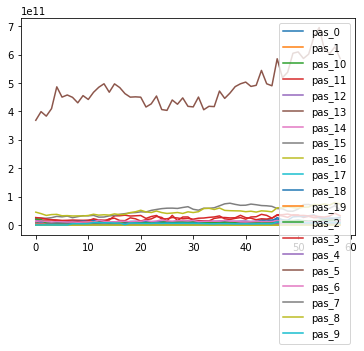

In [226]:
pas2.plot()

In [227]:
act_list = act.groupby('prod_reg_id')['value'].apply(list)
act_date = act.date.drop_duplicates().reset_index(drop=True)
d = dict(zip(act_list.index, act_list.values))
act2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
act2 = pd.concat([act_date, act2], ignore_index=False, axis=1)
act2 = act2.dropna()
act2

,date,act_0,act_1,act_10,act_11,act_12,act_13,act_14,act_15,act_16,...,act_18,act_19,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9
0,2010-02-01,4.183694e+12,6.923518e+11,1.424833e+11,1.638568e+11,1.505763e+11,2.644550e+11,1.241173e+11,1.427157e+11,1.491197e+11,...,1.571087e+11,6.079973e+10,5.675493e+11,9.344500e+11,1.713837e+11,4.052280e+11,1.651530e+11,2.402499e+11,9.752137e+10,1.274863e+11
1,2010-03-01,4.111507e+12,6.744258e+11,1.427542e+11,1.669745e+11,1.487827e+11,2.721080e+11,1.203647e+11,1.446479e+11,1.525226e+11,...,1.564153e+11,6.112935e+10,5.726654e+11,9.451800e+11,1.613711e+11,3.984587e+11,1.673873e+11,2.412568e+11,9.265874e+10,1.265900e+11
2,2010-04-01,4.123390e+12,6.840022e+11,1.406724e+11,1.632669e+11,1.479955e+11,2.650730e+11,1.196558e+11,1.486412e+11,1.523989e+11,...,1.594191e+11,6.371523e+10,5.022918e+11,9.682240e+11,1.570967e+11,3.916252e+11,1.664292e+11,2.457179e+11,8.843822e+10,1.268600e+11
3,2010-05-01,4.150444e+12,6.868643e+11,1.383253e+11,1.669282e+11,1.434052e+11,2.696250e+11,1.197530e+11,1.519025e+11,1.315012e+11,...,1.608113e+11,6.483194e+10,5.125165e+11,9.692880e+11,1.573884e+11,3.908289e+11,1.725812e+11,2.515802e+11,9.021913e+10,1.260464e+11
4,2010-06-01,4.242657e+12,6.869743e+11,1.478079e+11,1.699287e+11,1.472923e+11,2.703870e+11,1.199071e+11,1.556148e+11,1.246241e+11,...,1.641000e+11,6.519778e+10,5.111606e+11,1.005458e+12,1.599105e+11,4.026717e+11,1.796409e+11,2.562626e+11,9.255900e+10,1.520658e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2019-10-01,1.208952e+13,1.997527e+12,4.640629e+11,4.184509e+11,3.325384e+11,2.527000e+11,2.915891e+11,3.345992e+11,2.366896e+11,...,2.175998e+11,2.616199e+11,1.859909e+12,9.856160e+11,1.243274e+12,9.106490e+11,8.867919e+11,5.115236e+11,6.785744e+11,4.903443e+11
117,2019-11-01,1.190428e+13,1.935116e+12,4.765698e+11,4.186057e+11,3.375813e+11,2.610110e+11,2.960313e+11,3.523029e+11,2.324347e+11,...,2.255120e+11,2.607197e+11,1.860046e+12,9.931880e+11,1.272247e+12,9.008757e+11,9.235331e+11,5.189752e+11,7.308354e+11,4.952303e+11
118,2019-12-01,1.194358e+13,2.016574e+12,4.638609e+11,4.176623e+11,3.427891e+11,2.646250e+11,3.017981e+11,3.552079e+11,2.294373e+11,...,2.250085e+11,2.478093e+11,1.872025e+12,1.237970e+12,1.255542e+12,9.448475e+11,9.277347e+11,5.162431e+11,6.713251e+11,4.769529e+11
119,2020-01-01,1.175717e+13,1.963131e+12,4.613571e+11,3.951722e+11,3.278525e+11,2.695520e+11,3.102100e+11,3.304040e+11,2.277777e+11,...,2.171113e+11,2.329240e+11,1.859609e+12,1.248057e+12,1.272653e+12,9.340320e+11,8.837683e+11,4.766688e+11,6.413964e+11,4.755501e+11


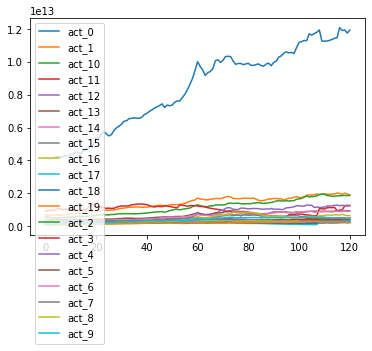

In [228]:
act2.plot()

In [229]:
interest_rate = pd.read_csv('interest_rate.csv', encoding='utf-8', sep=';', header=0)
interest_rate

,date,interest_rate
0,01.02.2015,0.1500
1,01.03.2015,0.1500
2,01.04.2015,0.1400
3,01.05.2015,0.1400
4,01.06.2015,0.1250
...,...,...
56,01.10.2019,0.0700
57,01.11.2019,0.0650
58,01.12.2019,0.0650
59,01.01.2020,0.0625


In [230]:
inflation = pd.read_csv('inflation.csv', encoding='utf-8', sep=';', header=0)
inflation

,date,inflation
0,01.02.2015,2.22
1,01.03.2015,1.21
2,01.04.2015,0.46
3,01.05.2015,0.35
4,01.06.2015,0.19
...,...,...
56,01.10.2019,0.13
57,01.11.2019,0.28
58,01.12.2019,0.36
59,01.01.2020,0.40


In [231]:
pas2['interest_rate'] = interest_rate['interest_rate']
pas2['inflation'] = inflation['inflation']

In [232]:
pas2.corr()

,pas_0,pas_1,pas_10,pas_11,pas_12,pas_13,pas_14,pas_15,pas_16,pas_17,...,pas_2,pas_3,pas_4,pas_5,pas_6,pas_7,pas_8,pas_9,interest_rate,inflation
pas_0,1.000000,0.634440,0.592737,0.324839,0.524805,0.287421,0.457660,0.315523,0.629637,0.113501,...,0.706049,0.589883,0.517667,0.503940,-0.058643,0.536432,-0.035288,0.317983,-0.369585,0.216703
pas_1,0.634440,1.000000,0.632983,0.379861,0.491218,0.228764,0.472806,0.467876,0.853811,0.061436,...,0.628034,0.753281,0.781218,0.679829,0.013417,0.776604,0.284007,0.633021,-0.609860,-0.171551
pas_10,0.592737,0.632983,1.000000,0.349187,0.629148,0.102397,0.248511,0.493076,0.617501,0.208263,...,0.650147,0.710381,0.625991,0.346559,0.108739,0.509633,0.311988,0.325516,-0.380458,0.092715
pas_11,0.324839,0.379861,0.349187,1.000000,0.211918,0.151433,0.327213,0.431739,0.358540,-0.134160,...,0.053138,0.316376,0.508353,0.295413,0.044335,0.313730,0.079178,0.366279,-0.435033,-0.197879
pas_12,0.524805,0.491218,0.629148,0.211918,1.000000,-0.042772,0.346879,0.669467,0.652563,-0.087711,...,0.610597,0.504857,0.575618,0.235073,0.328460,0.545022,0.231731,0.234290,-0.593458,-0.140070
pas_13,0.287421,0.228764,0.102397,0.151433,-0.042772,1.000000,-0.010847,-0.054953,0.193390,-0.066426,...,0.296404,0.361105,0.112614,0.475730,-0.368279,0.328100,-0.290978,0.232451,-0.133328,0.063617
pas_14,0.457660,0.472806,0.248511,0.327213,0.346879,-0.010847,1.000000,0.350211,0.347449,0.059551,...,0.178355,0.308518,0.298240,0.141957,0.216275,0.328348,0.198235,0.137102,-0.354049,0.028285
pas_15,0.315523,0.467876,0.493076,0.431739,0.669467,-0.054953,0.350211,1.000000,0.594781,-0.371309,...,0.315693,0.472500,0.742326,0.333212,0.172880,0.511398,0.058292,0.310935,-0.851436,-0.435617
pas_16,0.629637,0.853811,0.617501,0.358540,0.652563,0.193390,0.347449,0.594781,1.000000,-0.064791,...,0.723203,0.706690,0.873817,0.730091,-0.060181,0.852086,0.118696,0.536586,-0.735801,-0.296276
pas_17,0.113501,0.061436,0.208263,-0.134160,-0.087711,-0.066426,0.059551,-0.371309,-0.064791,1.000000,...,0.194130,0.092965,-0.169939,-0.263117,0.135674,-0.207585,0.149216,-0.322225,0.544751,0.409815


In [233]:
act2 = act2.iloc[-60::].reset_index(drop=True)
act2['interest_rate'] = interest_rate['interest_rate']
act2['inflation'] = inflation['inflation']
act2.corr()

,act_0,act_1,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,...,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,interest_rate,inflation
act_0,1.000000,0.894818,0.515221,0.873360,-0.589099,-0.413340,0.016531,0.765791,-0.845715,0.067182,...,0.945174,0.030639,0.798182,0.874789,0.879669,-0.352468,-0.123977,0.323487,-0.820368,-0.217568
act_1,0.894818,1.000000,0.701321,0.813356,-0.379316,-0.162051,0.159131,0.870154,-0.825278,0.303474,...,0.867018,0.271111,0.698271,0.844031,0.732602,-0.417580,0.018957,0.218247,-0.664588,-0.198669
act_10,0.515221,0.701321,1.000000,0.474721,0.163443,0.292706,0.534996,0.832327,-0.537603,0.551547,...,0.404368,0.508084,0.195208,0.539924,0.214394,-0.411823,0.222153,-0.005534,-0.110748,0.091413
act_11,0.873360,0.813356,0.474721,1.000000,-0.407573,-0.467470,0.088483,0.657480,-0.671205,-0.091296,...,0.787106,-0.059360,0.739565,0.811132,0.753936,-0.143979,-0.155160,0.433404,-0.678853,-0.154011
act_12,-0.589099,-0.379316,0.163443,-0.407573,1.000000,0.635627,0.480150,-0.132495,0.477762,0.294430,...,-0.691128,0.403458,-0.632944,-0.404283,-0.762009,0.197167,0.328984,-0.191146,0.848372,0.512429
act_13,-0.413340,-0.162051,0.292706,-0.467470,0.635627,1.000000,0.586540,0.184797,0.130654,0.849698,...,-0.455031,0.856713,-0.652293,-0.395960,-0.584797,-0.443684,0.194029,-0.704659,0.677204,0.387210
act_14,0.016531,0.159131,0.534996,0.088483,0.480150,0.586540,1.000000,0.420268,-0.142254,0.515038,...,-0.130078,0.661045,-0.417513,0.025304,-0.228761,-0.455825,-0.215590,-0.463498,0.387542,0.403156
act_15,0.765791,0.870154,0.832327,0.657480,-0.132495,0.184797,0.420268,1.000000,-0.816430,0.577511,...,0.700228,0.541359,0.414410,0.713350,0.540893,-0.588042,0.073813,-0.022121,-0.391397,0.024255
act_16,-0.845715,-0.825278,-0.537603,-0.671205,0.477762,0.130654,-0.142254,-0.816430,1.000000,-0.285517,...,-0.870838,-0.244714,-0.577754,-0.769453,-0.759905,0.573430,0.139166,-0.086638,0.588162,0.097889
act_17,0.067182,0.303474,0.551547,-0.091296,0.294430,0.849698,0.515038,0.577511,-0.285517,1.000000,...,0.030470,0.914280,-0.207525,0.048316,-0.125784,-0.653582,0.244804,-0.577526,0.216266,0.176197


Как итог, мы видим, что ставка ЦБ и инфляция плохо коррелируют с размещёнными депозитами и выданными кредитами, поэтому не стоит строить прогнозы на основе данных предикторов.

Как итог мы можем построить и обучить модель для прогнозирования временного ряда только на основе исторических данных, но эти предсказания будут оторваны от реального мира, и точность прогнозов по этим данным возможно будет далека от истины

In [243]:
pas2['date'] = pd.to_datetime(pas2['date'])
pas2.index = pas2['date']
pas2

,date,pas_0,pas_1,pas_10,pas_11,pas_12,pas_13,pas_14,pas_15,pas_16,...,pas_2,pas_3,pas_4,pas_5,pas_6,pas_7,pas_8,pas_9,interest_rate,inflation
date,,,,,,,,,,,,,,,,,,,,,
2015-02-01,2015-02-01,2.578500e+10,5.729000e+09,9.586000e+09,1.979800e+10,1.951800e+10,5.170000e+08,203000000.0,2.612200e+10,4.596300e+10,...,2.175700e+10,2.694700e+10,3.523000e+09,3.690000e+11,1.344900e+10,1.114000e+09,422000000.0,8.670000e+08,0.1500,2.22
2015-03-01,2015-03-01,1.212600e+10,5.294000e+09,6.564000e+09,1.787900e+10,7.899000e+09,6.000000e+08,228000000.0,2.475100e+10,4.086200e+10,...,1.991100e+10,2.534400e+10,3.671000e+09,3.993370e+11,1.524300e+10,1.114000e+09,343000000.0,8.890000e+08,0.1500,1.21
2015-04-01,2015-04-01,9.260000e+09,4.650000e+09,4.182000e+09,1.825400e+10,7.104000e+09,5.320000e+08,261000000.0,2.460700e+10,3.456300e+10,...,7.839000e+09,2.208800e+10,3.483000e+09,3.835400e+11,1.320300e+10,1.174000e+09,507000000.0,1.111000e+09,0.1400,0.46
2015-05-01,2015-05-01,9.330000e+09,5.119000e+09,3.678000e+09,1.870800e+10,6.900000e+09,4.960000e+08,269000000.0,2.665200e+10,3.751100e+10,...,7.320000e+09,1.938400e+10,3.787000e+09,4.098670e+11,1.129800e+10,1.161000e+09,544000000.0,1.062000e+09,0.1400,0.35
2015-06-01,2015-06-01,9.454000e+09,4.452000e+09,3.358000e+09,1.710500e+10,6.845000e+09,5.560000e+08,225000000.0,3.109900e+10,3.822200e+10,...,7.286000e+09,1.838400e+10,3.316000e+09,4.865000e+11,1.260000e+10,1.174000e+09,476000000.0,8.610000e+08,0.1250,0.19
2015-07-01,2015-07-01,8.888000e+09,3.985000e+09,2.653000e+09,1.686900e+10,6.278000e+09,4.770000e+08,204000000.0,2.954100e+10,3.329500e+10,...,6.562000e+09,1.591600e+10,3.382000e+09,4.503790e+11,1.195200e+10,1.211000e+09,328000000.0,7.380000e+08,0.1150,0.80
2015-08-01,2015-08-01,9.654000e+09,4.158000e+09,2.764000e+09,1.738700e+10,6.647000e+09,4.260000e+08,188000000.0,3.222700e+10,3.386400e+10,...,6.313000e+09,1.581000e+10,3.643000e+09,4.578780e+11,1.118800e+10,1.342000e+09,321000000.0,7.220000e+08,0.1150,0.35
2015-09-01,2015-09-01,9.039000e+09,3.986000e+09,3.138000e+09,1.835500e+10,6.811000e+09,4.310000e+08,144000000.0,2.651200e+10,3.260700e+10,...,6.151000e+09,1.412400e+10,3.448000e+09,4.495960e+11,1.154000e+10,1.626000e+09,278000000.0,5.556000e+09,0.1100,0.57
2015-10-01,2015-10-01,9.122000e+09,3.782000e+09,2.887000e+09,1.765000e+10,6.106000e+09,4.120000e+08,129000000.0,3.022400e+10,3.287900e+10,...,7.258000e+09,1.430400e+10,3.646000e+09,4.303060e+11,1.024700e+10,1.388000e+09,342000000.0,5.536000e+09,0.1100,0.74


In [251]:
from monthdelta import monthdelta
from statsmodels.tsa.api import ExponentialSmoothing

In [256]:
train = pas2[0:45]
test = pas2[45:]

In [260]:
model = ExponentialSmoothing(train.pas_0, trend='mul', damped=False, seasonal='mul', seasonal_periods=6).fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [261]:
pred = model.predict(start=test.index[-1], end=test.index[-1]+monthdelta(6))

<function matplotlib.pyplot.show(*args, **kw)>

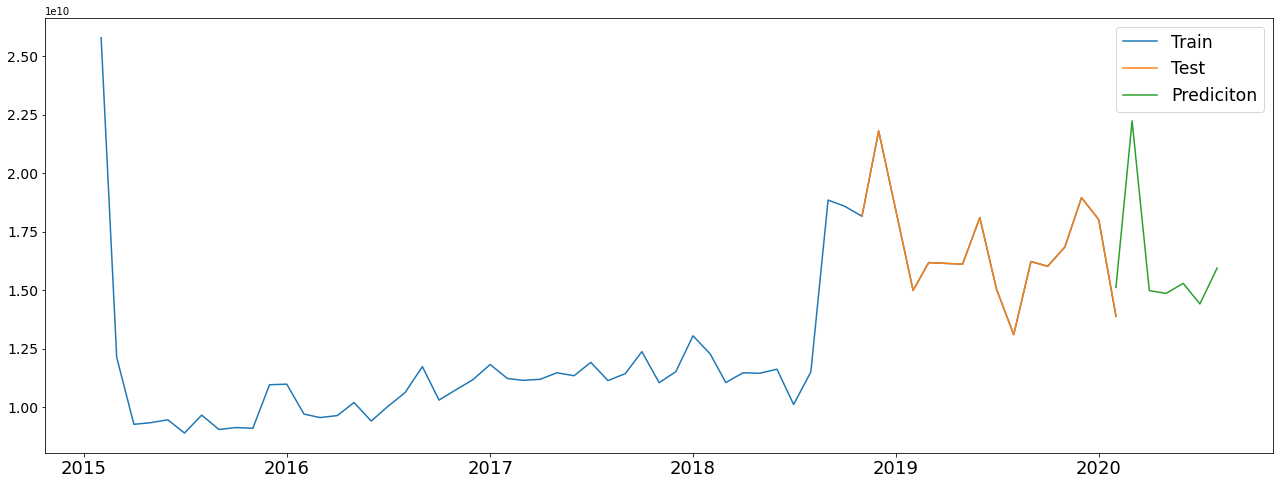

In [262]:
plt.figure(figsize=(22, 8))
plt.plot(pas2.index, pas2['pas_0'], label='Train')
# plt.plot(train.index, train, label='Train')
plt.plot(test.index, test.pas_0, label='Test')
plt.plot(pred.index, pred, label='Prediciton')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.show

В данном случае рассматривается в качестве примера модель экспоненциального сглаживания.